In [1]:
import numpy as np
import numpy.random as rm
import igraph as ig
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numba import jit
from tqdm.notebook import tqdm
from Kuramoto1 import Kuramoto

In [2]:
graph_ER_nx = ig.Graph.Read_Ncol("de_domenico/ToyModels_8Types_100Realizations/ER_N256/ER_r1.edges",directed=False,names=True)
graph_ER = graph_ER_nx.get_adjacency()
graph_ER = np.array(graph_ER.data)

graph_BA_nx = ig.Graph.Read_Ncol("de_domenico/ToyModels_8Types_100Realizations/BA_N256/BA_r1.edges",directed=False,names=True)
graph_BA = graph_BA_nx.get_adjacency()
graph_BA = np.array(graph_BA.data)

print("n^ edges in ER: ",graph_ER_nx.ecount(),"in BA: ",graph_BA_nx.ecount())

n^ edges in ER:  1620 in BA:  1515


In [9]:
T=5
dt=0.0001
coupling=6

model_ER = Kuramoto(coupling=coupling, dt=dt, T=T, n_nodes=len(graph_ER))
n_nodes_ER=model_ER.n_nodes

model_BA = Kuramoto(coupling=coupling, dt=dt, T=T, n_nodes=len(graph_BA))
n_nodes_BA=model_BA.n_nodes

In [4]:
eps=0.5
act_mat_ER = model_ER.run(adj_mat=graph_ER,eps=eps)
act_mat_BA = model_BA.run(adj_mat=graph_BA,eps=eps)

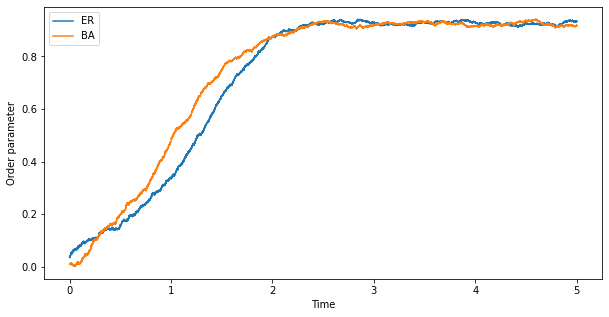

In [6]:
t=np.arange(0,T,dt)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t,[abs(sum(np.exp(1j*act_mat_ER[:,i])))/n_nodes_ER for i in range(int(T/dt))],label="ER")
ax.plot(t,[abs(sum(np.exp(1j*act_mat_BA[:,i])))/n_nodes_BA for i in range(int(T/dt))],label="BA")
ax.set_ylabel('Order parameter')
ax.set_xlabel('Time')
ax.legend()
plt.show()

In [7]:
def threshold_choice(corrcoef,N_v,t,ax,lab):
    
    TH=np.ones((N_v,N_v))*t
    adj_mat_t=np.heaviside(abs(corrcoef)-TH,1)-np.identity(N_v)
    G=ig.Graph.Adjacency(adj_mat_t)
    degree_sequence = np.array(G.degree())/2
    ax.bar(*np.unique(degree_sequence, return_counts=True),alpha=0.5,label="n_edges: "+str(int(G.ecount()/2))+lab)
            


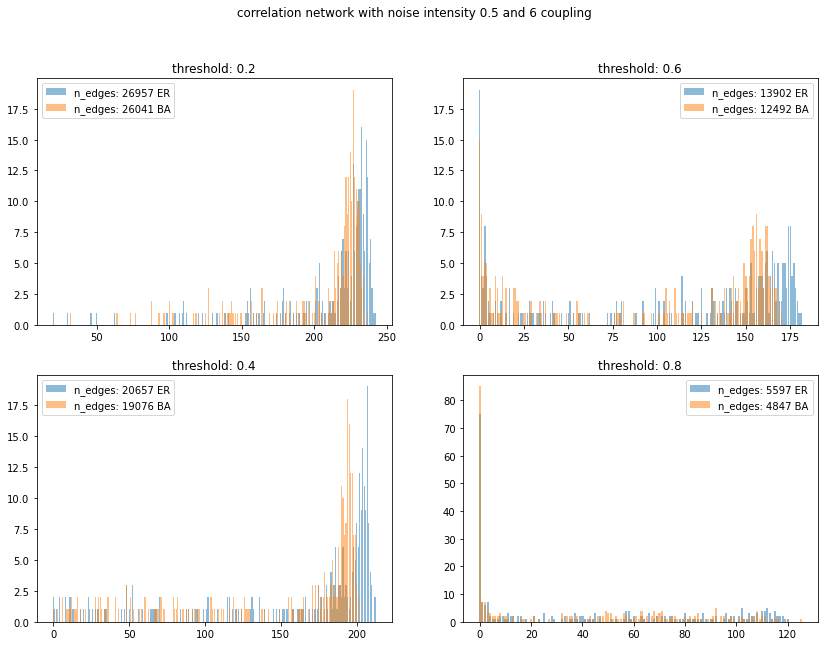

In [10]:
fig, axs = plt.subplots(2,2,figsize=(14, 10))
fig.suptitle("correlation network with noise intensity {} and {} coupling".format(eps,coupling))
threshold=[0.2,0.4,0.6,0.8]
CC_tot_ER=np.corrcoef(act_mat_ER)
CC_tot_BA=np.corrcoef(act_mat_BA)
for i,t in enumerate(threshold):
    axs[i%2,int(i/2)].set_title("threshold: {}".format(t))
    threshold_choice(CC_tot_ER,model_ER.n_nodes,t,axs[i%2,int(i/2)]," ER")
    threshold_choice(CC_tot_BA,model_BA.n_nodes,t,axs[i%2,int(i/2)]," BA")

for i in range(4):
    axs[i%2,int(i/2)].legend()
plt.show()


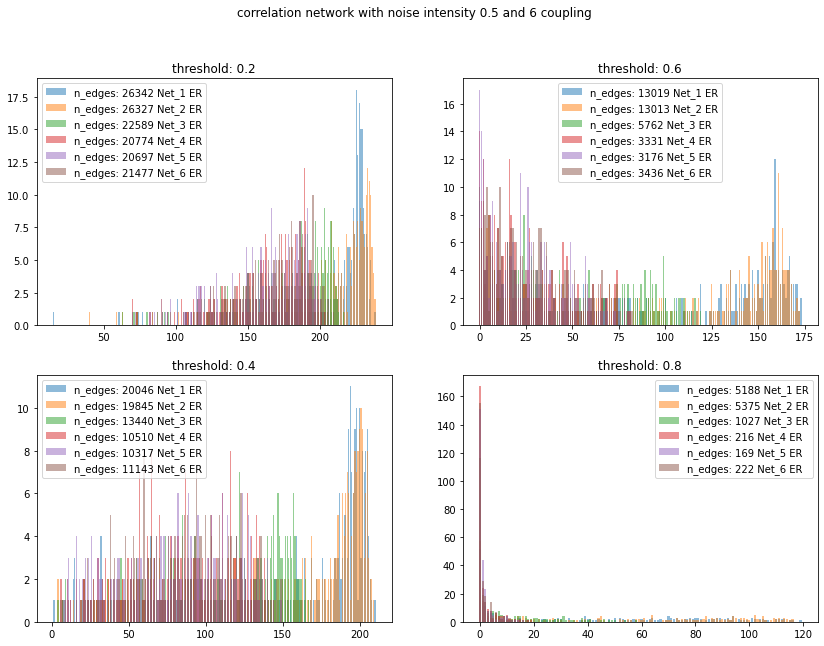

In [14]:
div=6
Nt_tot=int(T/dt)
Nt_div=int(Nt_tot/div)
fig, axs = plt.subplots(2,2,figsize=(14, 10))
fig.suptitle("correlation network with noise intensity {} and {} coupling".format(eps,coupling))

for j in range(div):
    CC1=np.corrcoef(act_mat_ER[:,j*Nt_div:(j+1)*Nt_div-1])
    for i,t in enumerate(threshold):
        axs[i%2,int(i/2)].set_title("threshold: {}".format(t))
        threshold_choice(CC1,model_ER.n_nodes,t,axs[i%2,int(i/2)]," Net_{} ER".format(j+1))
            #threshold_choice(CC_tot_BA,model_BA.n_nodes,t,axs[i%2,int(i/2)],"BA")
    
for i in range(4):
    axs[i%2,int(i/2)].legend()

[]

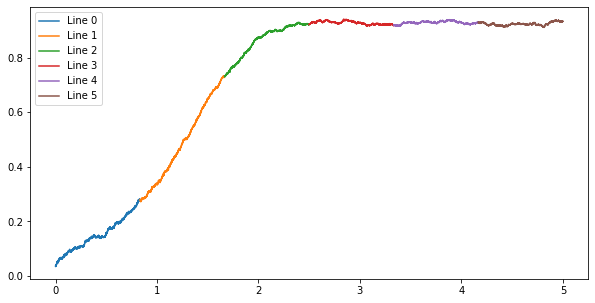

In [18]:
t=np.arange(0,T,dt)
fig, ax = plt.subplots(figsize=(10, 5))
for l in range(div):
    label = "Line {}".format(l)
    ax.plot(t[l*Nt_div:(l+1)*Nt_div-1],[abs(sum(np.exp(1j*act_mat_ER[:,l*Nt_div+j])))/n_nodes_ER for j in range(Nt_div-1)],label=label)
ax.legend()
plt.plot()